# **Data Science I**
#### **Alumno**: Mena, Jeremías
#### **Profesora**: Putrino, Daniela
#### **Tutor**: Neri Garcia, Patricio

## **Abstract**
El presente estudio explora cómo diferentes características laborales influyen en las decisiones que toma un trabajador al elegir su modalidad de empleo y las oportunidades a las que puede acceder. A partir de datos obtenidos de encuestas a trabajadores en diversas ciudades, se analizan factores como el lugar de residencia, el tipo de contrato, el nivel educativo, la edad y la experiencia laboral, con el objetivo de identificar las principales tendencias que impactan en las decisiones y oportunidades laborales. El análisis parte de cinco hipótesis clave que buscan comprender las relaciones entre estas variables.

Para realizar este estudio, se aplicaron técnicas de análisis exploratorio y modelado predictivo, utilizando un enfoque de aprendizaje supervisado para procesar los datos. Además, se llevaron a cabo análisis estadísticos para examinar las relaciones entre las variables clave.

## **Hipotésis**

El análisis variables asociadas a un empleo en diversas poblaciones plantea una serie de interrogantes sobre las características que influyen en las decisiones y oportunidades de los trabajadores. En este contexto, es fundamental investigar cómo diferentes factores, como el lugar de residencia, el tipo de contrato, la educación, la edad y el nivel de experiencia, pueden impactar de manera significativa en la toma de decisiones de un futuro empleado.

Este estudio busca explorar estas relaciones mediante cinco hipótesis clave que abordan cuestiones esenciales sobre las decisiones laborales. Se plantean hipótesis que indagan cómo el lugar de residencia influye en la modalidad de trabajo, cómo varían los ingresos según el tipo de contrato, y cómo el nivel educativo y la experiencia profesional se reflejan en la posición laboral y las decisiones sobre la dedicación horaria. Estas hipótesis, basadas en datos de una encuesta realizada por el equipo SysArmy, buscan proporcionar un enfoque adecuado para entender mejor las tendencias salariales y las dinámicas del trabajo en diferentes contextos.

1) La ciudad desde donde las personas trabajan suele impactar a la hora de elegir una modalidad de trabajo en particular. ¿Cómo varía esta modalidad según el lugar de residencia de los encuestados?

2) Los trabajadores independientes tienen un salario bruto mayor en comparación con los empleados que forman parte del staff de planta permanente. Partiendo de esta hipótesis surge la siguiente pregunta: ¿Cómo varía el salario bruto en función del tipo de contrato?

3) Aquellos trabajadores que poseen un título superior a un terciario suelen tener mayor nivel de seniority, ¿Es posible que la experiencia académica se vea reflejada en la experiencia laboral?

4) Los empleados con mayor experiencia laboral tienden a superar los 30 años de edad, ¿Cómo se refleja la edad de un trabajador en su nivel de seniority?

5) Los trabajadores con mayor nivel de seniority tienden a elegir trabajos de mitad de tiempo, ¿Cómo repercute el seniority de un trabajador a la hora de escoger la dedicación horaria laboral?

## **Conexión con el dataset**

In [ ]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default
from googleapiclient.discovery import build

# Credenciales de autenticación
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
# Manipulación del sheets
id = '1fmdnCca6Sfi0u9pSZ38oAoVigbyXDqDQ'
url = f'https://drive.google.com/uc?id={id}'


## **Creación de un dataframe a partir del dataset original**

In [ ]:
import pandas as pd
# Creación del data frame
df = pd.read_csv(url, encoding='utf-8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 50 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   estoy_trabajando_en                                                                   5767 non-null   object 
 1   donde_estas_trabajando                                                                5767 non-null   object 
 2   dedicacion                                                                            5767 non-null   object 
 3   tipo_de_contrato                                                                      5767 non-null   object 
 4   ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local                              5767 non-null   float64
 5   ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local                            

## **Selección de variables objetivo**
Para comenzar este estudio, se seleccionaron ocho de las cincuenta variables disponibles en el dataset original.

El motivo por el cual se escogieron estas variables en particular fue debido a que están estrechamente relacionadas con las hipótesis planteadas en el comienzo de este trabajo. Además, son variables representativas de la información asociada a los empleados encuestados.

In [ ]:
# Selección de variables del dataset original
variables = {'donde_trabajo': df['donde_estas_trabajando'],
             'modalidad_trabajo': df['modalidad_de_trabajo'],
             'contrato': df['tipo_de_contrato'],
             'edad': df['tengo_edad'],
             'dedicacion': df['dedicacion'],
             'salario_bruto': df['ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local'],
             'max_niv_estudios': df['maximo_nivel_de_estudios'],
             'estado_estudios': df['estado'],
             'seniority': df['seniority']
             }

# Creación de un nuevo data frame con las variables de interés
df_n = pd.DataFrame(variables)

df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   donde_trabajo      5767 non-null   object 
 1   modalidad_trabajo  5767 non-null   object 
 2   contrato           5767 non-null   object 
 3   edad               5767 non-null   object 
 4   dedicacion         5767 non-null   object 
 5   salario_bruto      5767 non-null   float64
 6   max_niv_estudios   2654 non-null   object 
 7   estado_estudios    2654 non-null   object 
 8   seniority          5767 non-null   object 
dtypes: float64(1), object(8)
memory usage: 405.6+ KB


## **Ciudades desde donde trabajan las personas encuestadas**

In [ ]:
df_n['donde_trabajo'].value_counts()

,count
donde_trabajo,
Ciudad Autónoma de Buenos Aires,2806
Buenos Aires,1242
Córdoba,575
Santa Fe,393
Mendoza,171
Entre Ríos,87
Tucumán,62
Neuquén,57
Corrientes,54


## **Edades de las personas encuestadas**

In [ ]:
df_n['edad'].value_counts()

,count
edad,
28,320
30,313
32,308
27,298
26,297
...,...
600,1
Jaja,1
30-40,1


## **Modalidades de trabajo**

In [ ]:
df_n['modalidad_trabajo'].value_counts()

,count
modalidad_trabajo,
100% remoto,3357
Híbrido (presencial y remoto),1943
100% presencial,467


## **Dedicación horaria laboral**

In [ ]:
df_n['dedicacion'].value_counts()

,count
dedicacion,
Full-Time,5486
Part-Time,281


## **Tipo de contrato**

In [ ]:
df_n['contrato'].value_counts()

,count
contrato,
Staff (planta permanente),4502
Remoto (empresa de otro país),521
Tercerizado (trabajo a través de consultora o agencia),505
Freelance,199
Participación societaria en una cooperativa,40


## **Seniority**

In [ ]:
df_n['seniority'].value_counts()

,count
seniority,
Senior,2447
Junior,1853
Semi-Senior,1450


## **Nivel máximo de estudios**

In [ ]:
df_n['max_niv_estudios'].value_counts()

,count
max_niv_estudios,
Universitario,1803
Terciario,424
Secundario,147
Posgrado/Especialización,139
Maestría,115
Doctorado,22
Posdoctorado,4


## **Estado de los estudios**

In [ ]:
df_n['estado_estudios'].value_counts()

,count
estado_estudios,
Completo,1262
En curso,837
Incompleto,555


## **Limpieza y manipulación de datos ausentes**
En esta etapa se procedió a limpiar el dataset formado en un principio por las ocho variables, ya que se encontraron muchos datos ausentes y errores propios de la recolección de los datos.

Para manipular los datos ausentes, se optó por reemplazar estos valores nulos por la etiqueta "Sin especificar" para las variables que indican los niveles de estudio y el estado de los mismos. Luego, se eliminaron aquellos nulos que pertenecían a otras variables, ya que no se los consideró importantes para el objeto de estudio.

In [ ]:
# Limpieza de los datos
exp1 = r'[^0-9]'
df_n['edad'] = df_n['edad'].replace(exp1, 0, regex=True)
df_n['edad'] = df_n['edad'].astype('int64') # Transformamos los datos al tipo entero para poder utilizar los filtros
filtro_edades = (df_n['edad'] >= 17) & (df_n['edad'] <= 70) # Filtro para las edades entre 17 y 70 años
df_n = df_n.loc[filtro_edades]

# Manejo de los datos nulos
df_n.loc[:,'max_niv_estudios'] = df_n['max_niv_estudios'].fillna('Sin especificar')
df_n.loc[:,'estado_estudios'] = df_n['estado_estudios'].fillna('Sin especificar')
df_n = df_n.dropna()

df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5750 entries, 0 to 5766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   donde_trabajo      5750 non-null   object 
 1   modalidad_trabajo  5750 non-null   object 
 2   contrato           5750 non-null   object 
 3   edad               5750 non-null   int64  
 4   dedicacion         5750 non-null   object 
 5   salario_bruto      5750 non-null   float64
 6   max_niv_estudios   5750 non-null   object 
 7   estado_estudios    5750 non-null   object 
 8   seniority          5750 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 449.2+ KB


## **Gráficos de las variables**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


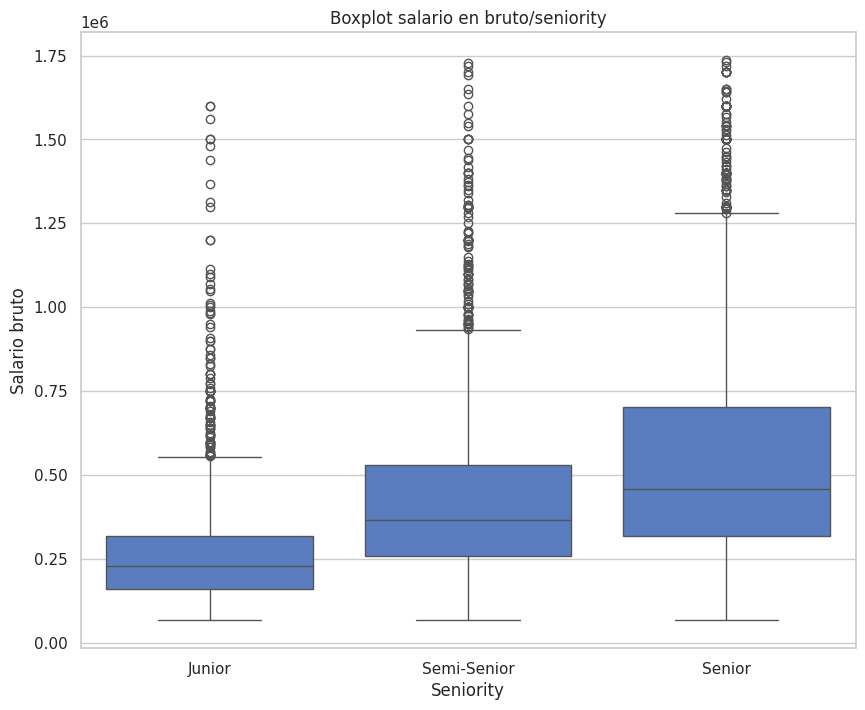

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de las variables salario_bruto y seniority
orden_seniority = ['Junior', 'Semi-Senior', 'Senior']
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="muted")
sns.boxplot(x=df_n['seniority'], y=df_n['salario_bruto'], order=orden_seniority)
plt.title('Boxplot salario en bruto/seniority')
plt.xlabel('Seniority')
plt.ylabel('Salario bruto')
plt.show()

A partir de este gráfico se puede concluir que:


* Los empleados con nivel "Senior" tienden a tener un salario más alto que los "Junior" y "Semi-senior".   
* Existe una mayor dispersión en los salarios en bruto del grupo de empleados con nivel "Senior". Esto lo podemos denotar gracias al tamaño de su rango intercuartílico.
* Si analizamos en profundidad la mediana de cada grupo, se puede observar que aumenta en cada categoría. Esto nos indica que a medida que el empleado avanza en su nivel profesional, es mejor remunerado.
* Las tres categorías cuentan con valores atípicos (outliers). Estos se extienden mucho más allá de los bigotes de cada grupo, lo que indica que existen empleados que tiene salarios significativamente mayores que la mayoría.



In [ ]:
# Métricas estadísticas asociadas a este gráfico
df_n.groupby('seniority')['salario_bruto'].describe()

,count,mean,std,min,25%,50%,75%,max
seniority,,,,,,,,
Junior,1853.0,271151.588073,178143.670909,68000.0,162276.0,230000.0,320000.0,1600000.0
Semi-Senior,1450.0,451515.849924,286180.304491,70000.0,260000.0,365594.0,530000.0,1727000.0
Senior,2447.0,554884.921508,332587.866783,70000.0,320000.0,460000.0,704000.0,1736000.0


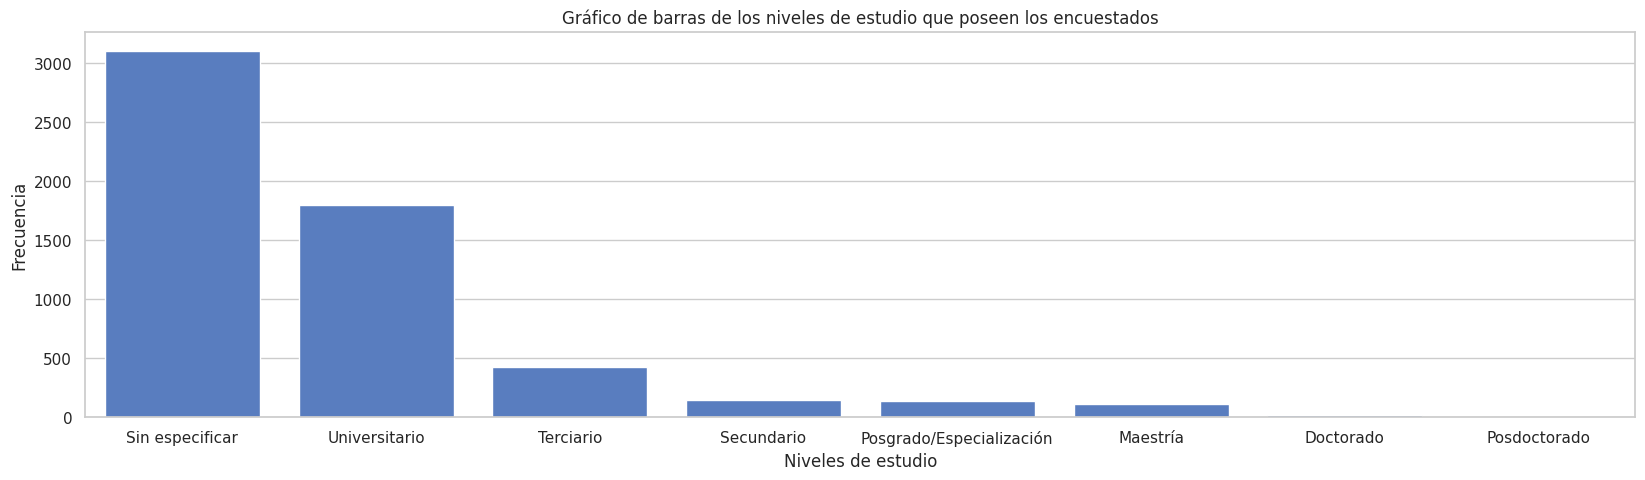

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras de los niveles de estudio
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid", palette="muted")
sns.countplot(data=df_n, x='max_niv_estudios')
plt.title('Gráfico de barras de los niveles de estudio que poseen los encuestados')
plt.xlabel('Niveles de estudio')
plt.ylabel('Frecuencia')
plt.show()

En este gráfico podemos observar que cuanto menor es el nivel de estudios, mayor es la cantidad de empleados. Sin embargo, es posible notar que el relevamiento de los datos no fue muy claro en esta sección dado que la mayoría de los encuestados no especificó su nivel de estudio.

In [ ]:
# Frecuencia de cada categoría
df_n['max_niv_estudios'].value_counts()

,count
max_niv_estudios,
Sin especificar,3107
Universitario,1798
Terciario,422
Secundario,146
Posgrado/Especialización,136
Maestría,115
Doctorado,22
Posdoctorado,4


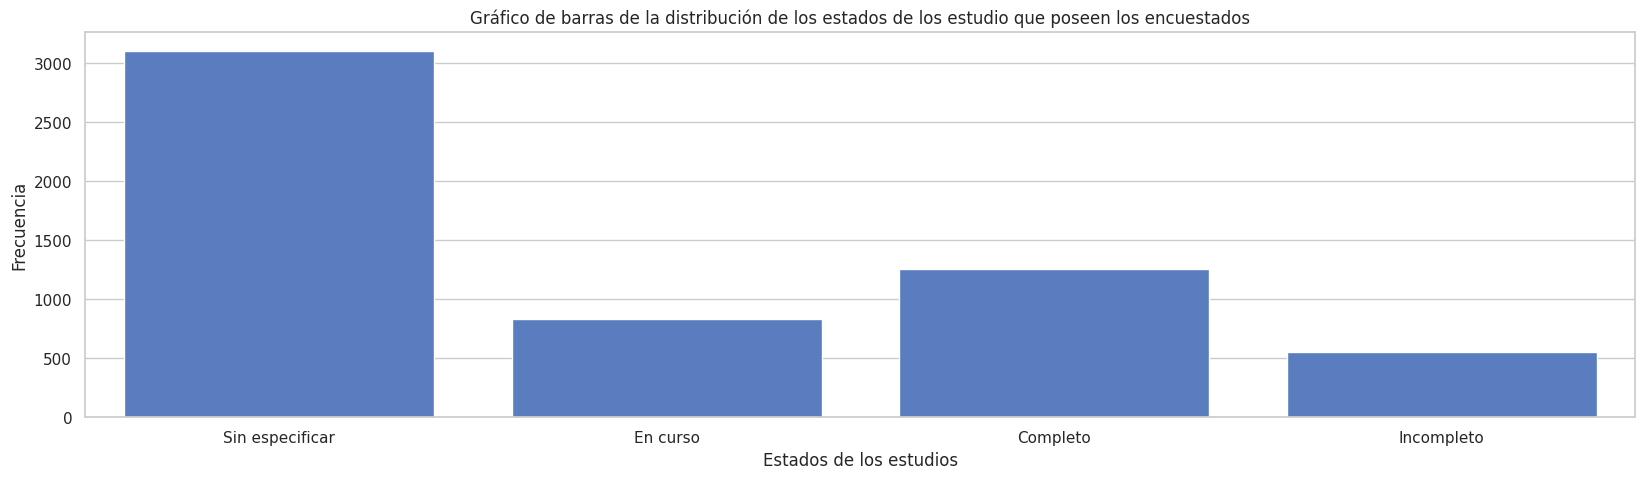

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barra del estado de los estudios
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid", palette="muted")
sns.countplot(data=df_n, x='estado_estudios')
plt.title('Gráfico de barras de la distribución de los estados de los estudio que poseen los encuestados')
plt.xlabel('Estados de los estudios')
plt.ylabel('Frecuencia')
plt.show()

 Si analizamos en profundidad este gráfico, podemos observar que una gran parte de los encuestados poseen los estudios completos. Sin embargo, encontramos también que muchos encuestados no especificaron el estado sus estudios, por lo que se concluye en que la etapa de relevamiento no fue clara.

In [ ]:
# Frecuencia de los estados de los estudios
df_n['estado_estudios'].value_counts()

,count
estado_estudios,
Sin especificar,3107
Completo,1257
En curso,834
Incompleto,552


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


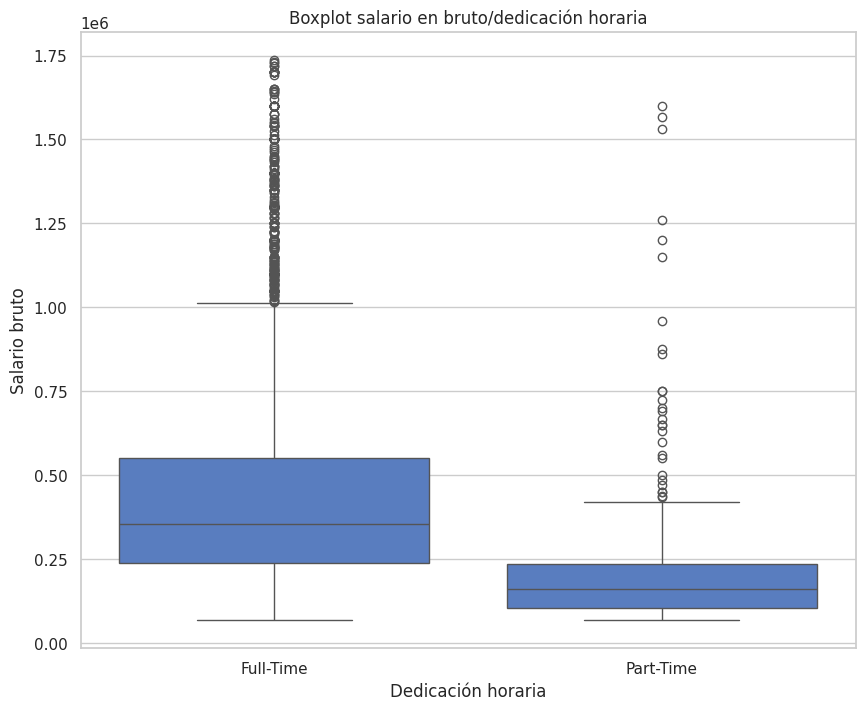

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de las variabels dedicacion y salario_bruto
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="muted")
sns.boxplot(x=df_n['dedicacion'], y=df_n['salario_bruto'])
plt.title('Boxplot salario en bruto/dedicación horaria')
plt.xlabel('Dedicación horaria')
plt.ylabel('Salario bruto')
plt.show()

En este histograma en particular podemos observar que aquellos empleados con dedicación Full-Time tienen salarios más altos en comparación con los trabajadores Part-Time. La mediana del salario para los trabajadores Full-Time es considerablemente mayor a la de los trabajadores Part-Time.  
Es posible observar también que los salarios de los trabajadores Full-Time tienen una mayor dispersión, lo que denota que existe una gama amplia de salarios en este tipo de dedicación.  
En el caso de los trabajadores Part-Time, los salarios son más bajos en general, y también hay menos dispersión.  
En cuanto a los valores atípicos, se puede ver que la categoría Full-Time tiene una cantidad superior a la Part-Time, lo que indica que existen individuos que ganan mucho más que el promedio.

In [ ]:
import pandas as pd

# Agrupación de las ciudades por región
Centro = ['Córdoba', 'Entre Ríos', 'Santa Fe', 'Buenos Aires', 'Ciudad Autónoma de Buenos Aires']
NOA = ['Catamarca', 'Jujuy', 'Salta', 'Santiago del Estero', 'Tucumán']
NEA = ['Chaco', 'Corrientes', 'Formosa', 'Misiones']
Patagonia = ['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego', 'La Pampa']
Cuyo = ['Mendoza','La Rioja','San Juan', 'San Luis']

def asignar_region(ciudad):
    if ciudad in Centro:
        return 'Región Centro'
    elif ciudad in NOA:
        return 'Región Noroeste'
    elif ciudad in NEA:
        return 'Región Noreste'
    elif ciudad in Patagonia:
        return 'Región Patagonia'
    else:
        return 'Región Cuyo'

df_n['region'] = df_n['donde_trabajo'].apply(asignar_region)


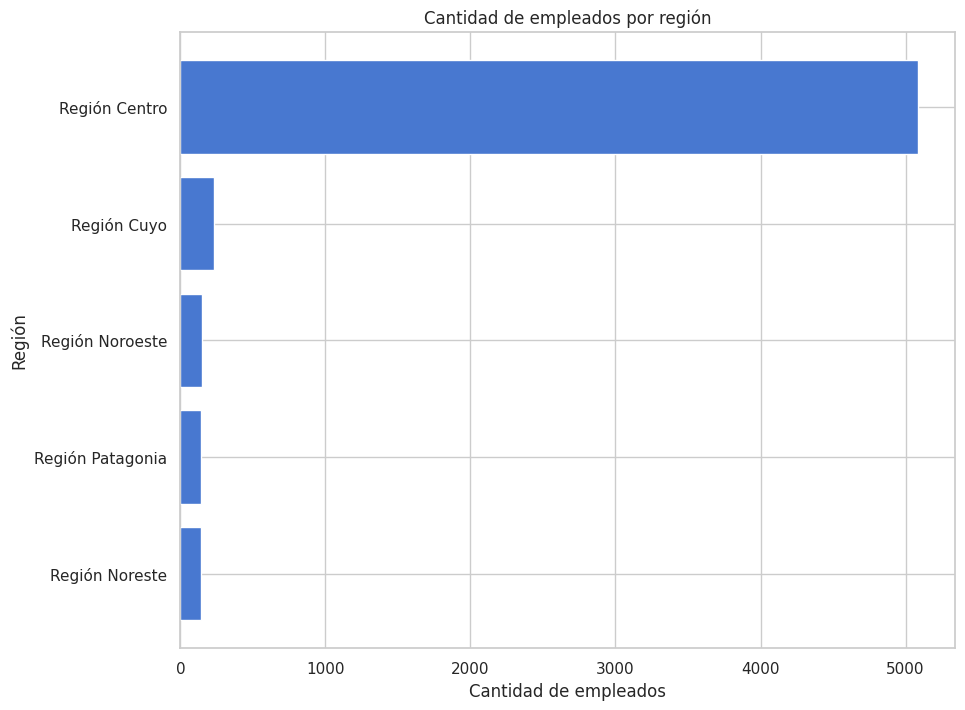

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras de la cantidad de empleados en la región Buenos Aires
contador_regiones = df_n['region'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(contador_regiones.index, contador_regiones.values)
plt.title('Cantidad de empleados por región')
plt.xlabel('Cantidad de empleados')
plt.ylabel('Región')
plt.show()

Como podemos observar en el gráfico de la cantidad de empleados que poseen cada una de las regiones, notamos que la región Centro es la que más tiene encuestados empleados. Esto es debido a que tanto Buenos Aires como la Ciudad Autónoma de Buenos Aires, pertenecen a esta región. Estas dos ciudades poseen a la mayoría de los encuestados, por lo que podríamos observar un sesgo orientado a las ciudades metropolitanas dentro de esta encuesta.

In [ ]:
# Cantidad de empleados en las ciudades de la región Centro
region_centro = df_n[df_n['region'] == 'Región Centro']
region_centro['donde_trabajo'].value_counts()

,count
donde_trabajo,
Ciudad Autónoma de Buenos Aires,2797
Buenos Aires,1238
Córdoba,575
Santa Fe,392
Entre Ríos,87


In [ ]:
# Cantidad de empleados en las ciudades de la región NOA
region_noa = df_n[df_n['region'] == 'Región Noroeste']
region_noa['donde_trabajo'].value_counts()

,count
donde_trabajo,
Tucumán,62
Salta,47
Jujuy,26
Santiago del Estero,8
Catamarca,5


In [ ]:
# Cantidad de empleados en las ciudades de la región NEA
region_nea = df_n[df_n['region'] == 'Región Noreste']
region_nea['donde_trabajo'].value_counts()

,count
donde_trabajo,
Corrientes,53
Chaco,46
Misiones,38
Formosa,4


In [ ]:
# Cantidad de empleados en las ciudades de la región Cuyo
region_cuyo = df_n[df_n['region'] == 'Región Cuyo']
region_cuyo['donde_trabajo'].value_counts()

,count
donde_trabajo,
Mendoza,170
San Juan,25
San Luis,23
La Rioja,11


In [ ]:
# Cantidad de empleados en las ciudades de la región Patagonia
region_patagonia = df_n[df_n['region'] == 'Región Patagonia']
region_patagonia['donde_trabajo'].value_counts()

,count
donde_trabajo,
Neuquén,57
Río Negro,44
Chubut,20
La Pampa,13
Tierra del Fuego,6
Santa Cruz,3


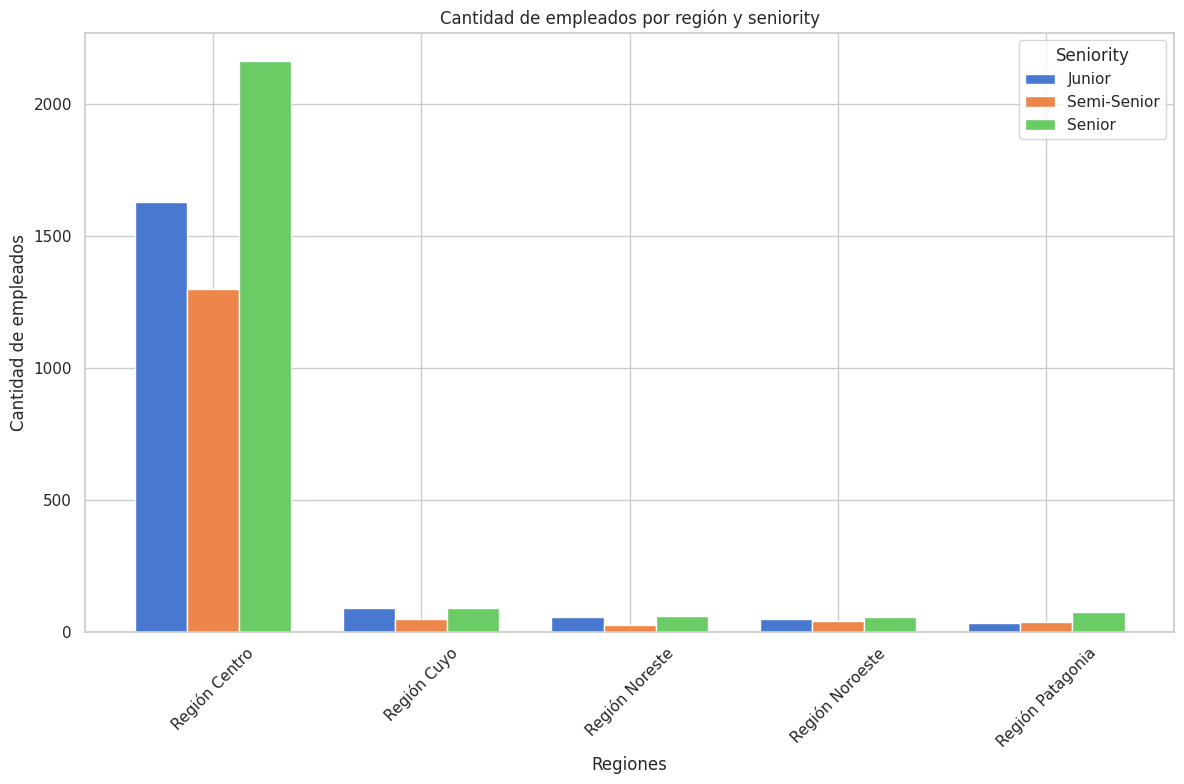

In [ ]:
# Gráfico de barra los niveles de seniority dividos por región
import matplotlib.pyplot as plt
import numpy as np

grupo = df_n.groupby(['region', 'seniority']).size().unstack()

regiones = grupo.index
seniority = grupo.columns
cantidad_empleados = grupo.values
ancho_barra = 0.25
pos = np.arange(len(regiones))

plt.figure(figsize=(12, 8))
for i in range(len(seniority)):
    plt.bar(pos + i * ancho_barra, cantidad_empleados[:, i], width=ancho_barra, label=seniority[i])

plt.xlabel('Regiones')
plt.ylabel('Cantidad de empleados')
plt.title('Cantidad de empleados por región y seniority')
plt.xticks(pos + ancho_barra * (len(seniority) - 1) / 2, regiones, rotation=45)
plt.legend(title='Seniority')
plt.tight_layout()
plt.show()

Analizando un poco más profundidad este gráfico, podemos concluir que, dentro de las cuatro regiones, la cantidad de empleados "Senior" es dominante respecto de los otros seniorities.
Seguida de la categoría "Senior", encontramos al nivel "Junior" con mayor cantidad de empleados, a excepción de la región Patagonia. En la misma, podemos observar que la cantidad de empleados en el nivel "Semi-Senior", supera a la categoría "Junior" por a penas 4 empleados.  
En el tercer puesto encontramos a la categoría "Semi-Senior". Sobre este nivel podemos notar que tiene su mayoría en la región Centro.

In [ ]:
# Cantidad de empleados (en todos los seniorities) en la región Centro
region_centro = df_n[df_n['region'] == 'Región Centro']
region_centro['seniority'].value_counts()

,count
seniority,
Senior,2163
Junior,1628
Semi-Senior,1298


In [ ]:
# Cantidad de empleados (en todos los seniorities) en la región NOA
region_noa = df_n[df_n['region'] == 'Región Noroeste']
region_noa['seniority'].value_counts()

,count
seniority,
Senior,58
Junior,49
Semi-Senior,41


In [ ]:
# Cantidad de empleados (en todos los seniorities) en la región NOA
region_nea = df_n[df_n['region'] == 'Región Noreste']
region_nea['seniority'].value_counts()

,count
seniority,
Senior,59
Junior,55
Semi-Senior,27


In [ ]:
# Cantidad de empleados (en todos los seniorities) en la región Cuyo
region_cuyo = df_n[df_n['region'] == 'Región Cuyo']
region_cuyo['seniority'].value_counts()

,count
seniority,
Senior,92
Junior,89
Semi-Senior,48


In [ ]:
# Cantidad de empleados (en todos los seniorities) en la región Patagonia
region_patagonia = df_n[df_n['region'] == 'Región Patagonia']
region_patagonia['seniority'].value_counts()

,count
seniority,
Senior,75
Semi-Senior,36
Junior,32


##  **Manejo de outliers**
En esta sección del trabajo se escalaron las variables numéricas a través del método de escalado robusto, con el fin de hacer más eficientes las predicciones.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_n['salario_bruto'] = scaler.fit_transform(df_n[['salario_bruto']])
df_n['edad'] = scaler.fit_transform(df_n[['edad']])

## **Métodos de codificación para las variabes categóricas**
En esta fase, se utilizaron dos tipos de métodos de codificación de variables: Label enconding y One Hot Encoding. La razón de elección de estos dos métodos es por su eficiencia, además de la necesidad de algunos modelos para realizar predicciones.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LE para ciudades
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['donde_trabajo'])
enc_ciudades = pd.DataFrame(enc_data, columns=['donde_trabajo'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OHE para ciudades
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df_n[['donde_trabajo']])
enc_ohe_ciudades = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['donde_trabajo']))

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LE para modalidades de trabajo
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['modalidad_trabajo'])
dec_data = enc.inverse_transform(enc_data)
enc_modalidades = pd.DataFrame(enc_data, columns=['modalidad_trabajo'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OHE para modalidades de trabajo
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df_n[['modalidad_trabajo']])
dec_data = enc.inverse_transform(enc_data)
enc_ohe_modalidades = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['modalidad_trabajo']))

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LE para dedicación laboral
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['dedicacion'])
enc_dedicacion = pd.DataFrame(enc_data, columns=['dedicacion'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OHE para dedicación laboral
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df_n[['dedicacion']])
enc_ohe_dedicacion = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['dedicacion']))

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LE para tipo de contrato de trabajo
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['contrato'])
enc_tipos_contrato = pd.DataFrame(enc_data, columns=['contrato'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OHE para tipo de contrato de trabajo
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df_n[['contrato']])
enc_ohe_contrato = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['contrato']))

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# OE para nivel de seniority
orden = [['Junior', 'Semi-Senior', 'Senior']]
enc = OrdinalEncoder(categories=orden)
enc_data = enc.fit_transform(df_n[['seniority']])
enc_seniorities = pd.DataFrame(enc_data, columns=["seniority"])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OHE para nivel de seniority
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df_n[['seniority']])
enc_ohe_seniorities = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['seniority']))

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# OE para nivel de estudios
orden = [['Sin especificar', 'Secundario', 'Terciario', 'Universitario', 'Posgrado/Especialización', 'Maestría', 'Doctorado', 'Posdoctorado']]
enc = OrdinalEncoder(categories=orden)
enc_data = enc.fit_transform(df_n[['max_niv_estudios']])
enc_nivel_estudios = pd.DataFrame(enc_data, columns=['max_niv_estudios'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OHE para nivel de estudios
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df_n[['max_niv_estudios']])
enc_ohe_nivel_estudios = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['max_niv_estudios']))

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# OE para estado de los estudios
orden = [['Sin especificar', 'Incompleto', 'En curso', 'Completo']]
enc = OrdinalEncoder(categories=orden)
enc_data = enc.fit_transform(df_n[['estado_estudios']])
enc_estado_estudios = pd.DataFrame(enc_data, columns=['estado_estudios'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OHE para nivel de estudios
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(df_n[['estado_estudios']])
enc_ohe_estado_estudios = pd.DataFrame(enc_data, columns=enc.get_feature_names_out(['estado_estudios']))

## **Modelos predictivos**
En esta etapa del estudio se realizaron predicciones con distintos modelos, a fin de poder evaluarlos para lograr responder a cada una de las preguntas de interés planteadas en los comienzos de este estudio.

Los modelos elegidos fueron: árboles de decisión y K vecinos cercanos para los problemas de clasificación tales como el nivel de seniority o la modalidad de trabajo. En cambio, para lograr predecir los salarios y las edades de los empleados teniendo en cuenta el resto de variables, se empleó un modelo de regresión lineal.


### **Hipótesis n° 1**
La ciudad desde donde las personas trabajan suele impactar a la hora de elegir una modalidad de trabajo en particular. ¿Cómo varía esta modalidad según el lugar de residencia de los encuestados?

Exactitud: 50.29%
Precisión: 50.29%
Recall: 50.29%
F1: 50.28%


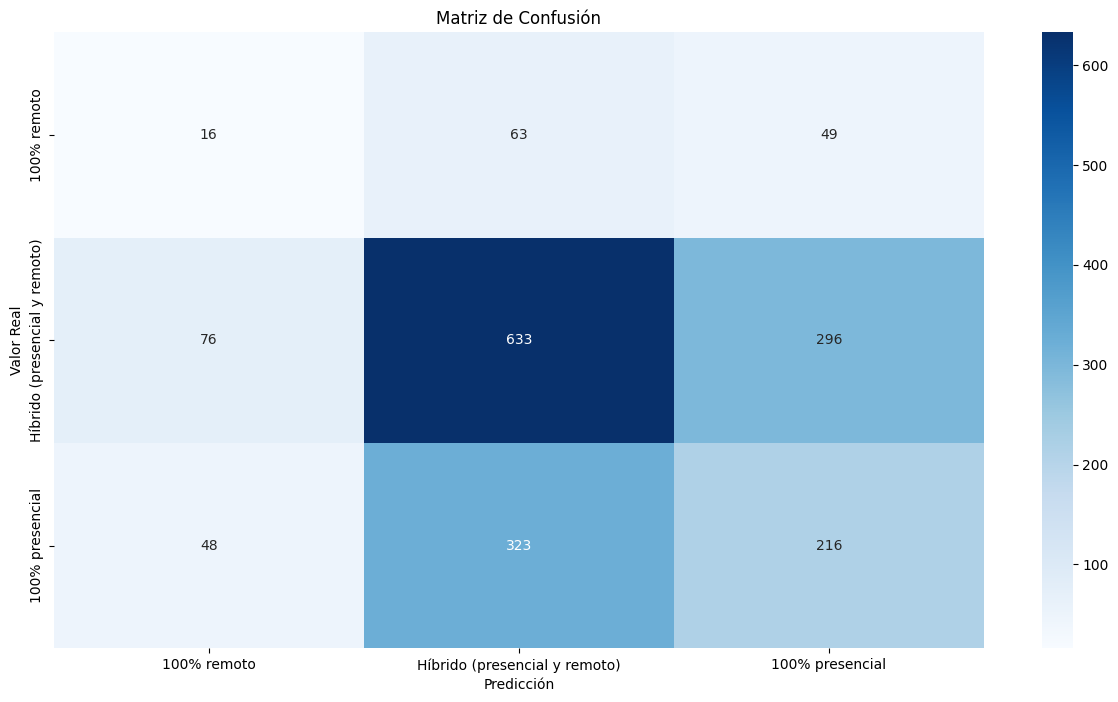

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Codificamos la variable target y armamos el dataset con las demás variables
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['modalidad_trabajo'])
dec_data = enc.inverse_transform(enc_data)
enc_modalidades_2 = pd.DataFrame(enc_data, columns=['modalidad_trabajo'])
dec_modalidades_2 = pd.DataFrame(dec_data, columns=['modalidad_trabajo'])

df_enc = pd.concat([enc_ciudades,
                    enc_modalidades_2,
                    enc_dedicacion,
                    enc_tipos_contrato,
                    enc_seniorities,
                    enc_nivel_estudios,
                    enc_estado_estudios,
                    df_n['salario_bruto'],
                    df_n['edad']], axis=1)

df_enc = df_enc.dropna()

# Preparamos el dataset para entrenar y la variable target
X = df_enc.drop(columns = ['modalidad_trabajo'])
y = df_enc['modalidad_trabajo']

# Separamos el dataset en los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos y ajustamos el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Predecimos la variable target. En nuestro caso: modalidades de trabajo
y_pred = clf.predict(X_test)

# Calculamos las métricas del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
cm = metrics.confusion_matrix(y_test, y_pred)

print(f"Exactitud: {round(accuracy * 100, 2)}%" )
print(f"Precisión: {round(precision * 100, 2)}%" )
print(f"Recall: {round(recall * 100, 2)}%" )
print(f"F1: {round(f1 * 100, 2)}%" )

# Visualizamos la matriz de confusión
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dec_modalidades_2['modalidad_trabajo'].unique(), yticklabels=dec_modalidades_2['modalidad_trabajo'].unique())
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()


### **Conclusiones**
A partir de las métricas previamente calculadas podemos observar que, a ciencia cierta, no es posible predecir de manera efectiva la modalidad de trabajo que un empleado elegiría teniendo en cuenta su lugar de residencia.  Aunque tiene algunas predicciones correctas, su capacidad de clasificación está limitada, como lo refleja el bajo valor de la métrica F1-Score

Este problema se encuentra principalmente asociado al desbalance que existe entre las clases a predecir, teniendo en nuestro dataset original: 3357 registros asociados a la clase "100% remoto", 1943 a la clase "Híbrido (presencial y remoto)" y 467 a la clase "100% presencial".

Hay muchas confusiones entre las clases "Híbrido (presencial y remoto)" y "100% presencial", con el modelo previendo "Híbrido (presencial y remoto)" en lugar de "100% presencial" en 312 casos.
La clase "100% remoto" también está siendo clasificada de manera errónea en un número considerable (77 errores hacia "Híbrido (presencial y remoto)" y 44 hacia "100% presencial"). Sin embargo, se puede ver que hay una cantidad decente de predicciones correctas en todas las clases, lo cual indica que el modelo ha aprendido algo, pero la capacidad de distinguir entre clases no es suficiente.

Exactitud: 48.49%
Precisión: 49.96%
Recall: 48.49%
F1: 49.16%


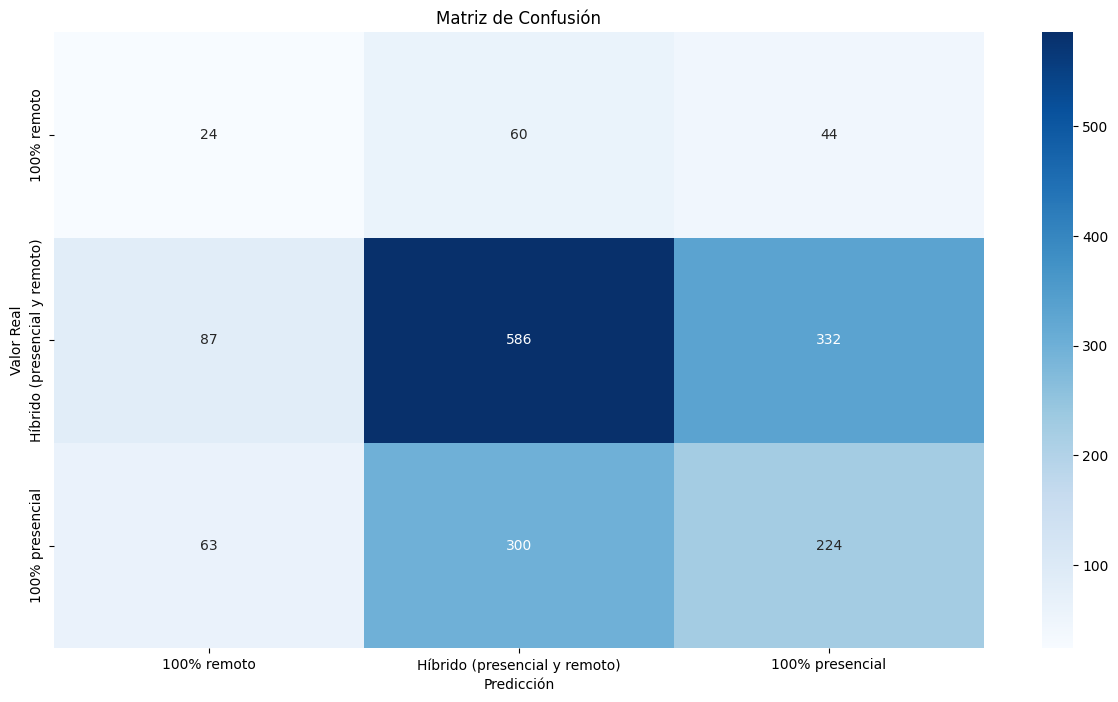

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Codificamos la variable target y armamos el dataset con las demás variables
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['modalidad_trabajo'])
dec_data = enc.inverse_transform(enc_data)
enc_modalidades_3 = pd.DataFrame(enc_data, columns=['modalidad_trabajo'])
dec_modalidades_3 = pd.DataFrame(dec_data, columns=['modalidad_trabajo'])

df_enc = pd.concat([enc_ciudades,
                    enc_modalidades,
                    enc_dedicacion,
                    enc_tipos_contrato,
                    enc_seniorities,
                    enc_nivel_estudios,
                    enc_estado_estudios,
                    df_n['salario_bruto'],
                    df_n['edad']], axis=1)

df_enc = df_enc.dropna()

# Preparamos el dataset para entrenar y la variable target
X = df_enc.drop(columns = ['modalidad_trabajo'])
y = df_enc['modalidad_trabajo']

# Separamos el dataset en los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remuestreamos el conjunto de datos de entrenamiento y la variable target
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Entrenamos y ajustamos el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable target. En nuestro caso: modalidades de trabajo
y_pred = clf.predict(X_test)

# Calculamos las métricas del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
cm = metrics.confusion_matrix(y_test, y_pred)

print(f"Exactitud: {round(accuracy * 100, 2)}%" )
print(f"Precisión: {round(precision * 100, 2)}%" )
print(f"Recall: {round(recall * 100, 2)}%" )
print(f"F1: {round(f1 * 100, 2)}%" )

# Visualizamos la matriz de confusión
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dec_modalidades_3['modalidad_trabajo'].unique(), yticklabels=dec_modalidades_3['modalidad_trabajo'].unique())
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

### **Conclusiones**
Pese a haber balanceado las clases, no se ha logrado una mejoría en las predicciones y métricas del modelo. De hecho, estas últimas han disminuído.

Se puede obsvervar que el modelo ha previsto la clase "100% remoto" en 87 ocasiones, cuando el valor real era Híbrido (presencial y remoto). De la misma manera sucedió con la clase "100% presencial", pero en este caso fueron 332 predicciones erróneas.

Si bien los casos verdaderos positivos, son favorables para las clases "Híbrido (presencial y remoto)" y "100% presencial", no logran ser los suficientes para determinar que el modelo ha aprendido la totalidad de los datos.

Exactitud: 46.28%
Precisión: 52.69%
Recall: 46.28%
F1: 48.58%


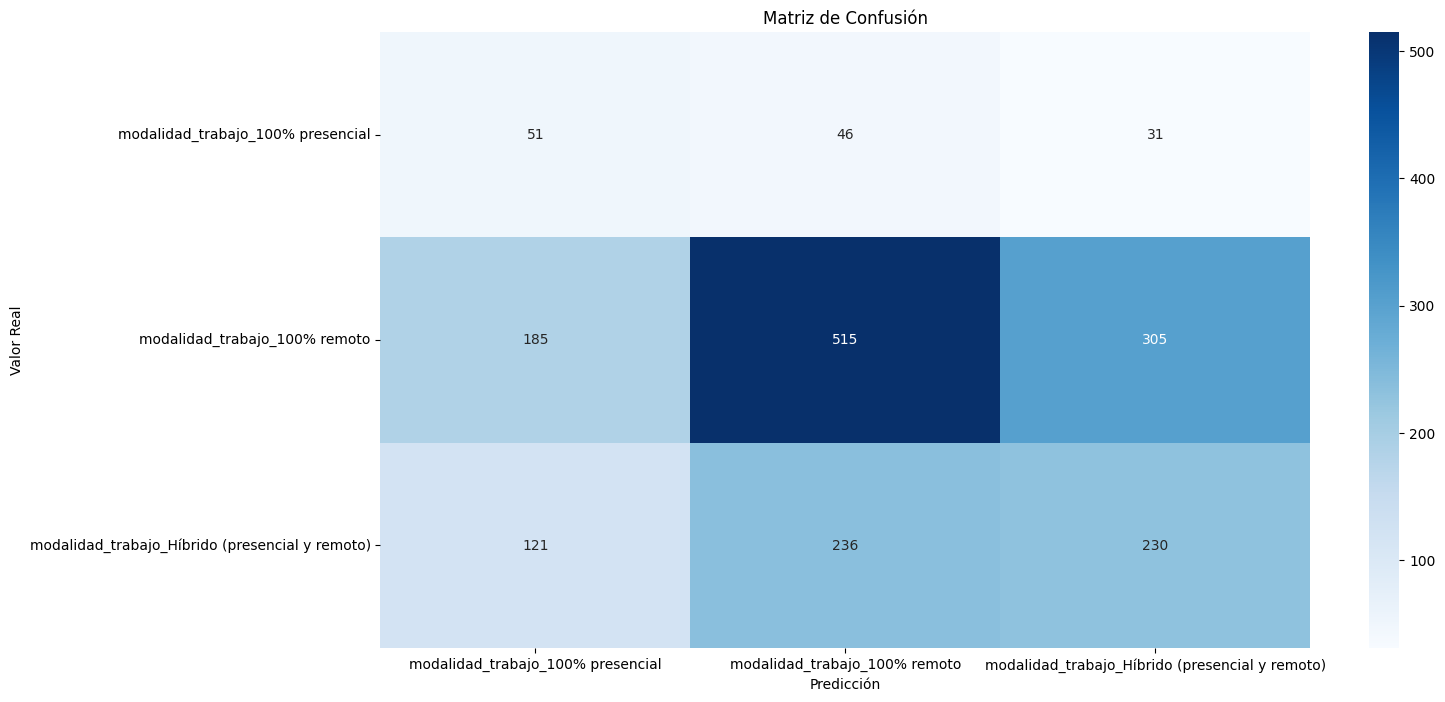

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC

# Separamos las variables en categoricas y numericas
categorical_ = df_n.select_dtypes(include=['object'])
numeric_ = df_n.select_dtypes(exclude=['object'])

# Codificamos las variables
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(categorical_)
enc_ohe_df = pd.DataFrame(enc_data, columns=enc.get_feature_names_out())
df_enc = pd.concat([enc_ohe_df, numeric_], axis=1)
df_enc = df_enc.dropna()

# Preparamos el dataset y la variable target
X = df_enc.drop(columns = ['modalidad_trabajo_100% presencial', 'modalidad_trabajo_Híbrido (presencial y remoto)','modalidad_trabajo_100% remoto'])
y = df_enc[['modalidad_trabajo_100% presencial', 'modalidad_trabajo_Híbrido (presencial y remoto)','modalidad_trabajo_100% remoto']]

# Separamos en datos de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_single = y_train.idxmax(axis=1)
y_test_single = y_test.idxmax(axis=1)

# Balanceamos las clases
indices_columnas = list(range(len(X.columns)-2))
sm = SMOTENC(random_state=42, categorical_features=indices_columnas)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train_single)

# Entrenamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable target
y_pred = knn.predict(X_test)

# Calculamos las métricas
accuracy = metrics.accuracy_score(y_test_single, y_pred)
precision = metrics.precision_score(y_test_single, y_pred, average='weighted')
recall = metrics.recall_score(y_test_single, y_pred, average='weighted')
f1 = metrics.f1_score(y_test_single, y_pred, average='weighted')
cm = metrics.confusion_matrix(y_test_single, y_pred)

print(f"Exactitud: {round(accuracy * 100, 2)}%" )
print(f"Precisión: {round(precision * 100, 2)}%" )
print(f"Recall: {round(recall * 100, 2)}%" )
print(f"F1: {round(f1 * 100, 2)}%" )

# Visualizamos la matriz de confusión
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_single), yticklabels=np.unique(y_test_single))
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()


### **Conclusiones**
A partir del análisis del mapa de calor, podemos concluir que el modelo no logra predecir de manera eficiente las modalidades de trabajo elegidas por los encuestados.

La baja exactitud del modelo sugiere que tiene dificultades para clasificar correctamente una gran parte de los datos, lo que indica que la ciudad de residencia, por sí sola, no es un factor lo suficientemente fuerte como para predecir con precisión la modalidad de trabajo.

En cuanto a la precisión, si bien el modelo acierta en poco más de la mitad de los casos, este rendimiento varía según las clases. La predicción de la modalidad "100% remota" parece ser más efectiva, lo que podría estar sesgando la precisión hacia esta clase. Sin embargo, existe una considerable confusión entre las modalidades presencial e híbrido, lo cual impacta negativamente en esta métrica.

El recall, que es menor al 50%, indica que el modelo no está capturando correctamente muchas de las modalidades reales. Esto sugiere que las características utilizadas no proporcionan una diferenciación clara entre las diferentes clases de trabajo, lo que limita la capacidad del modelo para generalizar correctamente.

A pesar de haber balanceado las clases y probado con diferentes modelos, no se han observado mejoras significativas en el rendimiento.

### **Hipótesis n° 2**
Los trabajadores independientes tienen un salario bruto mayor en comparación con los empleados que forman parte del staff de planta permanente. Partiendo de esta hipótesis surge la siguiente pregunta: ¿Cómo varía el salario bruto en función del tipo de contrato?

Error cuadrático medio (RMSE): 0.97
Coeficiente de determinación (R^2): 0.01


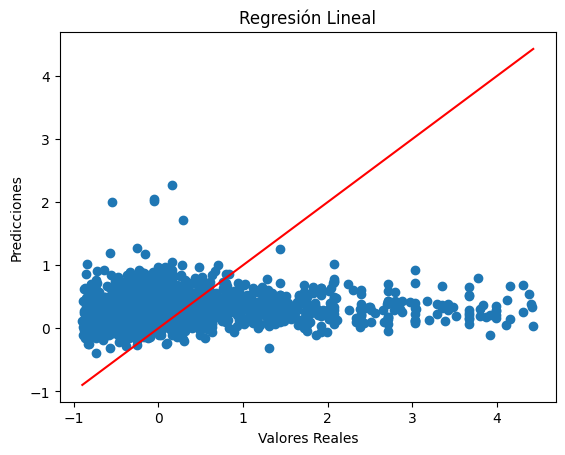

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTENC

# Creamos un dataset con las variables codificadas
df_enc = pd.concat([
    enc_ohe_ciudades,
    enc_ohe_modalidades,
    enc_ohe_dedicacion,
    enc_ohe_contrato,
    enc_ohe_seniorities,
    enc_ohe_nivel_estudios,
    enc_ohe_estado_estudios,
    df_n['salario_bruto'],
    df_n['edad']
], axis=1)

df_enc = df_enc.dropna()

# Preparamos el dataset y la variable target
X = df_enc.drop(columns = ['salario_bruto'])
y = df_enc['salario_bruto']

# Separamos en datos de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predecimos la variable target
y_pred = lr.predict(X_test)

# Calculamos las métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (RMSE): {round(mse, 2)}")
print(f"Coeficiente de determinación (R^2): {round(r2, 2)}")

# Visualizamos los resultados del modelo
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal')
plt.show()

### **Conclusiones**
Teniendo en cuenta las métricas resultantes podemos concluir en que un modelo lineal no es adecuado para realizar predicciones de este tipo.

El coeficiente de determinación tiene un valor cecano a cero, lo que indica que el modelo apenas explica la variabilidad en los datos.Se puede observar que el modelo de regresión lineal no captura adecuadamente la relación entre las variables predictoras y el salario bruto. Es posible que las variables utilizadas no sean lo suficientemente fuertes o lineales para predecir los salarios con precisión. Además, el RMSE alto refleja una diferencia significativa entre los datos reales y las predicciones.

En líneas futuras de este trabajo, se podría escoger un modelo no lineal para una predicción más adecuada.

### **Hipótesis n° 3**
Aquellos trabajadores que poseen un título superior a un terciario suelen tener mayor nivel de seniority, ¿Es posible que la experiencia académica se vea reflejada en la experiencia laboral?

Exactitud: 39.07%
Precisión: 38.7%
Recall: 39.07%
F1: 38.83%


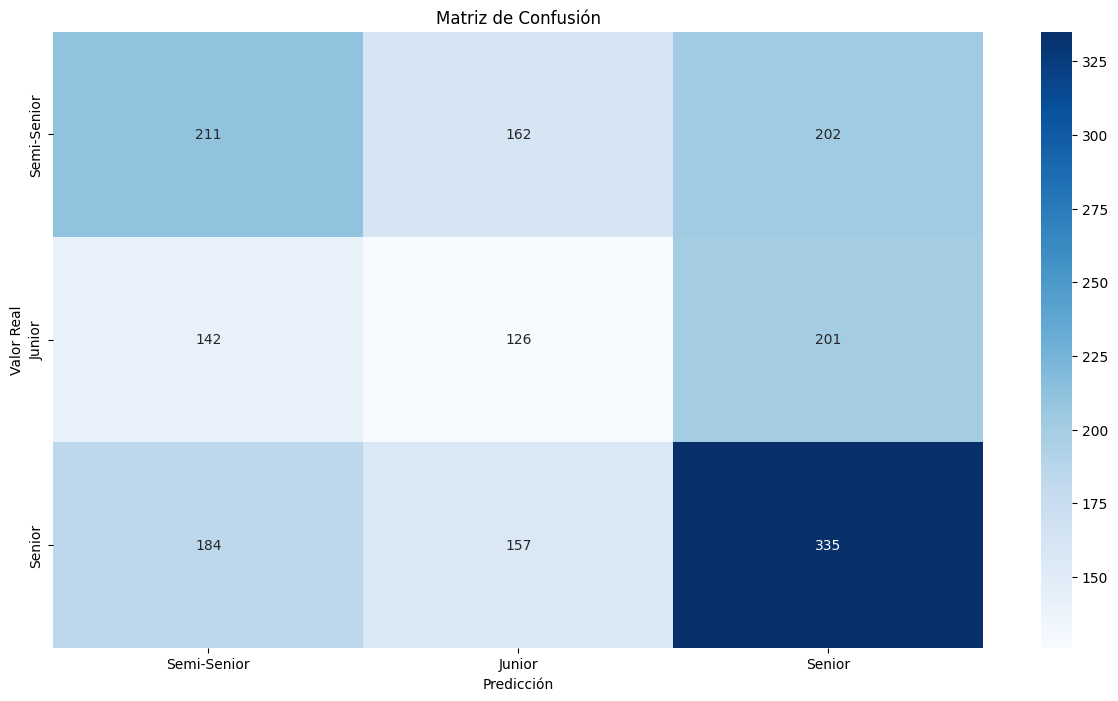

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Codificamos la variable target y armamos el dataset con las demás variables
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['seniority'])
dec_data = enc.inverse_transform(enc_data)
enc_seniorities_2 = pd.DataFrame(enc_data, columns=['seniority'])
dec_seniorities_2 = pd.DataFrame(dec_data, columns=['seniority'])

df_enc = pd.concat([enc_ciudades,
                    enc_modalidades,
                    enc_dedicacion,
                    enc_tipos_contrato,
                    enc_seniorities_2,
                    enc_nivel_estudios,
                    enc_estado_estudios,
                    df_n['salario_bruto'],
                    df_n['edad']], axis=1)

df_enc = df_enc.dropna()

# Preparamos el dataset para entrenar y la variable target
X = df_enc.drop(columns = ['seniority'])
y = df_enc['seniority']

# Separamos el dataset en los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos y ajustamos el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable target. En nuestro caso: modalidades de trabajo
y_pred = clf.predict(X_test)

# Calculamos las métricas del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
cm = metrics.confusion_matrix(y_test, y_pred)

print(f"Exactitud: {round(accuracy * 100, 2)}%" )
print(f"Precisión: {round(precision * 100, 2)}%" )
print(f"Recall: {round(recall * 100, 2)}%" )
print(f"F1: {round(f1 * 100, 2)}%" )

# Visualizamos la matriz de confusión
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dec_seniorities_2['seniority'].unique(), yticklabels=dec_seniorities_2['seniority'].unique())
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

### **Conclusiones**

Observando este mapa de calor, podemos encontrarnos nuevamente frente a un desbalance de clases. Sin embargo, hay ciertos puntos a remarcar.

En primeras instancias, se logra apreciar que el modelo ha aprendido algo. La diagonal principal de este gráfico tiene un número importante de predicciones verdaderas positivas. La clase que más destaca de estos casos es la clase "Senior".

Si revisitamos la cantidad de registros de cada clase podemos ver que la clase "Senior"	cuenta con 997 registros más que la clase "Semi-Senior" y con 594 registros más que la clase "Junior". Esto nos indica un fuerte sesgo hacia la clase mayoritaria, lo que claramente afecta al rendimiento del modelo.

Sobre las métricas es importante denotar que definen un bajo rendimiento del modelo, ya que las cuatro tiene un valor menor al 50%, lo que indica que es un escenario peor a aquel en el cual "se tira una moneda al aire" para realizar una predicción.

Exactitud: 39.07%
Precisión: 38.75%
Recall: 39.07%
F1: 38.84%


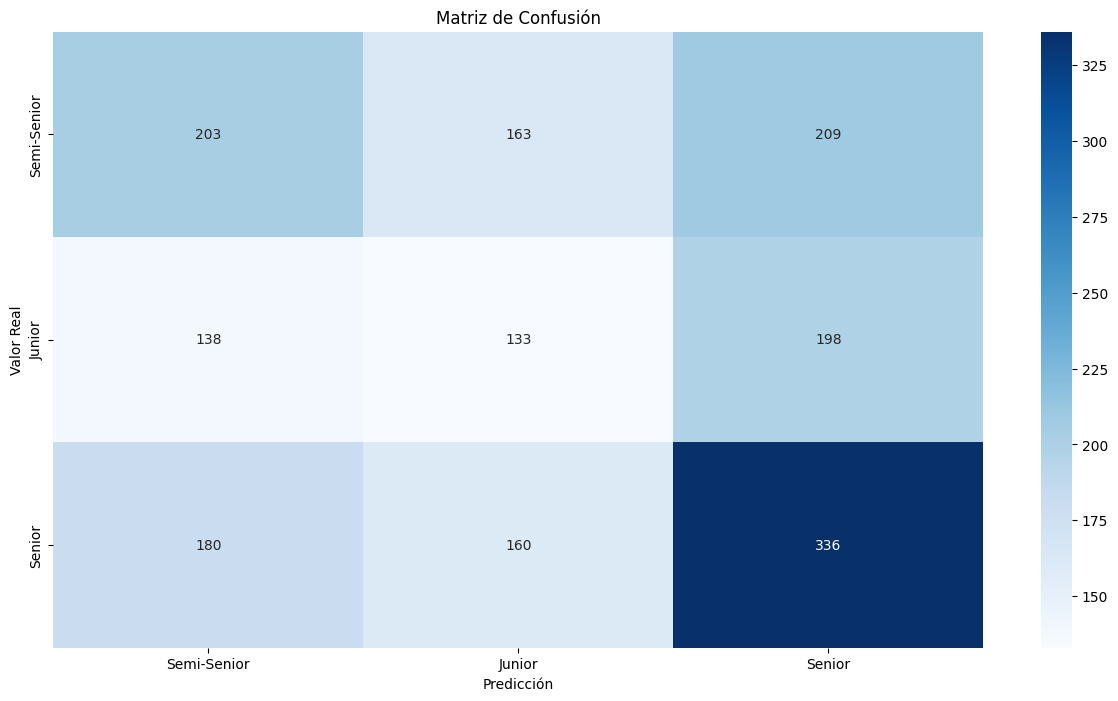

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Codificamos la variable target y armamos el dataset con las demás variables
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['seniority'])
dec_data = enc.inverse_transform(enc_data)
enc_seniorities_2 = pd.DataFrame(enc_data, columns=['seniority'])
dec_seniorities_2 = pd.DataFrame(dec_data, columns=['seniority'])

df_enc = pd.concat([enc_ciudades,
                    enc_modalidades,
                    enc_dedicacion,
                    enc_tipos_contrato,
                    enc_seniorities_2,
                    enc_nivel_estudios,
                    enc_estado_estudios,
                    df_n['salario_bruto'],
                    df_n['edad']], axis=1)

df_enc = df_enc.dropna()

# Preparamos el dataset para entrenar y la variable target
X = df_enc.drop(columns = ['seniority'])
y = df_enc['seniority']

# Separamos el dataset en los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remuestreamos el conjunto de datos de entrenamiento y la variable target
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Entrenamos y ajustamos el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable target. En nuestro caso: modalidades de trabajo
y_pred = clf.predict(X_test)

# Calculamos las métricas del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
cm = metrics.confusion_matrix(y_test, y_pred)

print(f"Exactitud: {round(accuracy * 100, 2)}%" )
print(f"Precisión: {round(precision * 100, 2)}%" )
print(f"Recall: {round(recall * 100, 2)}%" )
print(f"F1: {round(f1 * 100, 2)}%" )

# Visualizamos la matriz de confusión
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dec_seniorities_2['seniority'].unique(), yticklabels=dec_seniorities_2['seniority'].unique())
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

### **Conclusiones**
Luego de balancear las clases, podemos ver que el rendimiento del modelo no ha cambiado significativamente. Los valores de las métricas son similares a los obtenidos anteriormente.

En cuanto a las predicciones, se observa que la clase "Senior" ha sido la clase mayoritaria. Seguida de esta encontramos a la clase "Semi-Senior" con 203 casos verdaderos positivos, y por último a la clase "Junior" con 133.

Este escenario es desfavorable para poder contestar nuestra pregunta de interés, ya que el modelo no es capaz de clasificar correctamente las clases.
Esto lo podemos observar entre las clases "Junior" y "Semi-Senior", además de que existe un fuerte sesgo hacia la clase "Senior". Tampoco es capaz de encontrar una relación entre las características elegidas para el entrenamiento del mismo y la variable target. Esto se refleja en los valores de las métricas.

Exactitud: 36.8%
Precisión: 38.32%
Recall: 36.8%
F1: 37.06%


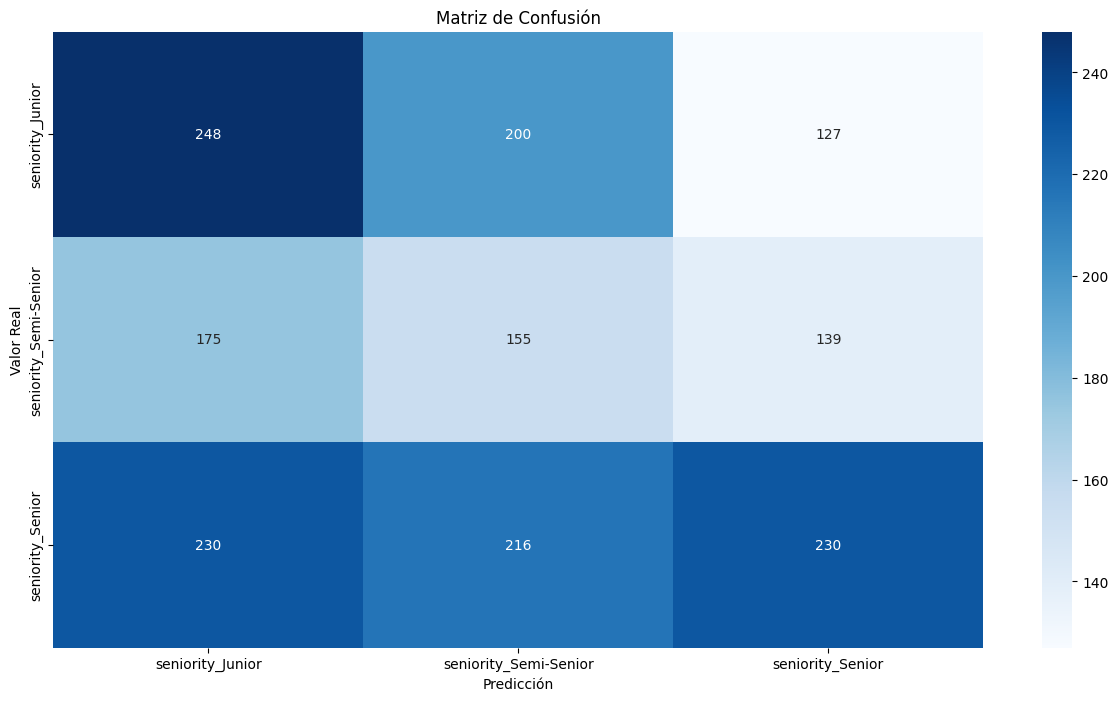

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC

# Separamos las variables en categoricas y numericas
categorical_ = df_n.select_dtypes(include=['object'])
numeric_ = df_n.select_dtypes(exclude=['object'])

# Codificamos las variables
enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(categorical_)
enc_ohe_df = pd.DataFrame(enc_data, columns=enc.get_feature_names_out())
df_enc = pd.concat([enc_ohe_df, numeric_], axis=1)
df_enc = df_enc.dropna()

# Preparamos el dataset y la variable target
X = df_enc.drop(columns = ['seniority_Junior', 'seniority_Semi-Senior','seniority_Senior'])
y = df_enc[['seniority_Junior', 'seniority_Semi-Senior','seniority_Senior']]

# Separamos en datos de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_single = y_train.idxmax(axis=1)
y_test_single = y_test.idxmax(axis=1)

# Balanceamos las clases
indices_columnas = list(range(len(X.columns)-2))
sm = SMOTENC(random_state=42, categorical_features=indices_columnas)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train_single)

# Entrenamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable target
y_pred = knn.predict(X_test)

# Calculamos las métricas
accuracy = metrics.accuracy_score(y_test_single, y_pred)
precision = metrics.precision_score(y_test_single, y_pred, average='weighted')
recall = metrics.recall_score(y_test_single, y_pred, average='weighted')
f1 = metrics.f1_score(y_test_single, y_pred, average='weighted')
cm = metrics.confusion_matrix(y_test_single, y_pred)

print(f"Exactitud: {round(accuracy * 100, 2)}%" )
print(f"Precisión: {round(precision * 100, 2)}%" )
print(f"Recall: {round(recall * 100, 2)}%" )
print(f"F1: {round(f1 * 100, 2)}%" )

# Visualizamos la matriz de confusión
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_single), yticklabels=np.unique(y_test_single))
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

### **Conclusiones**
En este escenario en particular, con un nuevo modelo entrenado y las clases balanceadas, podemos denotar que no hubo mejoría alguna en el rendimiento del modelo y, por si eso no fuera poco, tampoco en las predicciones.

Se puede apreciar que los casos falsos positivos y falsos negativos han aumentado significativamente en contraste con los verdaderos positivos y verdaderos negativos. Además, las métricas tienen índices similares al modelo visto anteriormente.

### **Hipótesis n° 4**
Los empleados con mayor experiencia laboral tienden a superar los 30 años de edad, ¿Cómo se refleja la edad de un trabajador en su nivel de seniority?

Error cuadrático medio (RMSE): 0.49
Coeficiente de determinación (R^2): 0.01


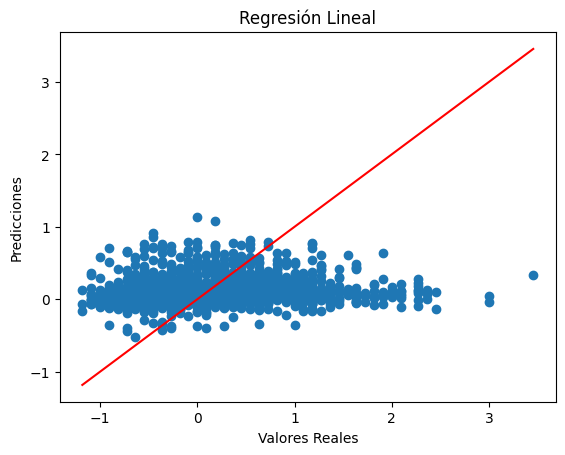

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTENC

# Creamos un dataset con las variables codificadas
df_enc = pd.concat([
    enc_ohe_ciudades,
    enc_ohe_modalidades,
    enc_ohe_dedicacion,
    enc_ohe_contrato,
    enc_ohe_seniorities,
    enc_ohe_nivel_estudios,
    enc_ohe_estado_estudios,
    df_n['salario_bruto'],
    df_n['edad']
], axis=1)

df_enc = df_enc.dropna()

# Preparamos el dataset y la variable target
X = df_enc.drop(columns = ['edad'])
y = df_enc['edad']

# Separamos en datos de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predecimos la variable target
y_pred = lr.predict(X_test)

# Calculamos las métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (RMSE): {round(mse, 2)}")
print(f"Coeficiente de determinación (R^2): {round(r2, 2)}")

# Visualizamos los resultados del modelo
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal')
plt.show()

### **Conclusiones**
En comparación con el modelo lineal planteado anteriormente, podemos observar un comportamiento similar a pesar de haber cambiado la variable target.

Nuevamente podemos observar que el coeficiente de determinación es notablemente bajo, casi llegando a 0, lo que indica que el modelo apenas logra explicar la variabilidad de los datos. Esto sugiere que la regresión lineal no captura de manera efectiva la relación entre las variables seleccionadas para el proceso de entrenamiento y la edad de los empleados. Sin embargo, el RMSE menor en comparación con el obtenido en el escenario donde la variable target era el salario bruto.

Como en el caso de las predicciones para el salario bruto, estas se podrían mejorar si se elige un modelo no lineal para realizarlas.

### **Hipótesis n° 5**
Los trabajadores con mayor nivel de seniority tienden a elegir trabajos de mitad de tiempo, ¿Cómo repercute el seniority de un trabajador a la hora de escoger la dedicación horaria laboral?

Exactitud: 87.85%
Precisión: 91.79%
Recall: 87.85%
F1: 89.69%


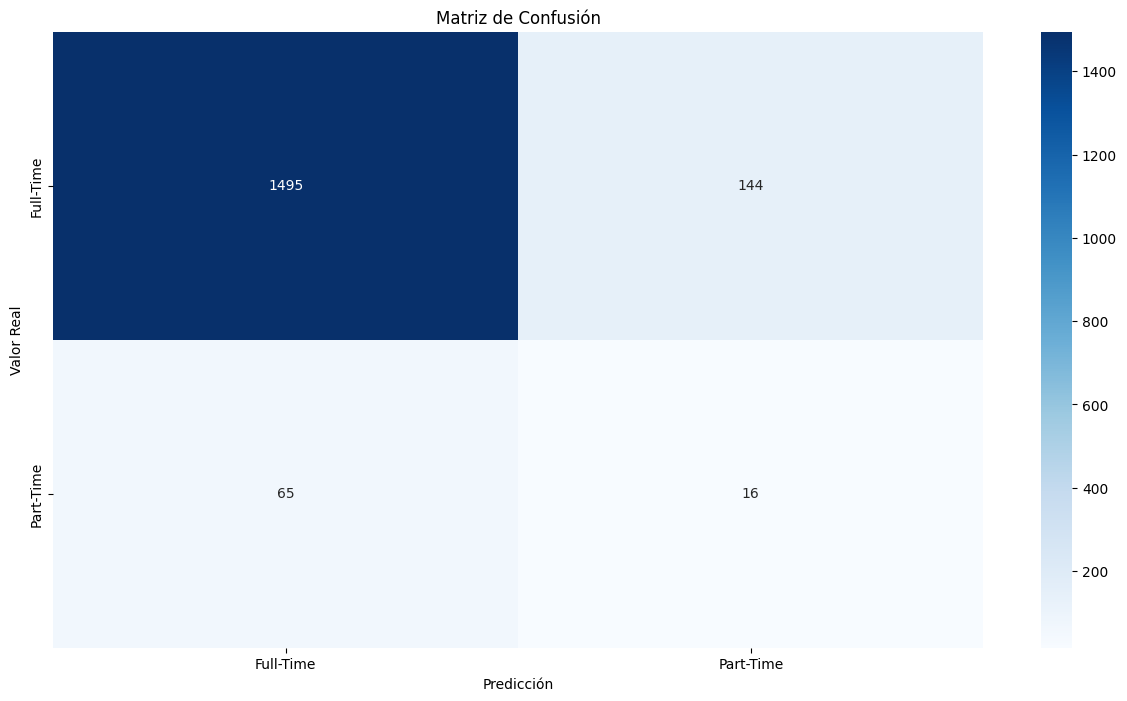

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Codificamos la variable target y armamos el dataset con las demás variables
enc = LabelEncoder()
enc_data = enc.fit_transform(df_n['dedicacion'])
dec_data = enc.inverse_transform(enc_data)
enc_dedicacion_2 = pd.DataFrame(enc_data, columns=['dedicacion'])
dec_dedicacion_2 = pd.DataFrame(dec_data, columns=['dedicacion'])

df_enc = pd.concat([enc_ciudades,
                    enc_modalidades,
                    enc_dedicacion_2,
                    enc_tipos_contrato,
                    enc_seniorities,
                    enc_nivel_estudios,
                    enc_estado_estudios,
                    df_n['salario_bruto'],
                    df_n['edad']], axis=1)

df_enc = df_enc.dropna()

# Preparamos el dataset para entrenar y la variable target
X = df_enc.drop(columns = ['dedicacion'])
y = df_enc['dedicacion']

# Separamos el dataset en los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remuestreamos el conjunto de datos de entrenamiento y la variable target
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Entrenamos y ajustamos el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Predecimos la variable target. En nuestro caso: modalidades de trabajo
y_pred = clf.predict(X_test)

# Calculamos las métricas del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
cm = metrics.confusion_matrix(y_test, y_pred)

print(f"Exactitud: {round(accuracy * 100, 2)}%" )
print(f"Precisión: {round(precision * 100, 2)}%" )
print(f"Recall: {round(recall * 100, 2)}%" )
print(f"F1: {round(f1 * 100, 2)}%" )

# Visualizamos la matriz de confusión
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dec_dedicacion_2['dedicacion'].unique(), yticklabels=dec_dedicacion_2['dedicacion'].unique())
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

### **Conclusiones**
Este mapa de calor, en conjunto con las métricas resultantes, nos demuestran que el modelo presenta un rendimiento efectivo para predecir la dedicación laboral que eligirán los empleados encuestados, en base a su seniority.

Como se puede apreciar, contamos con 1495 casos verdareros positivos para la clase "Full-Time" y 16 casos para la clase "Part-Time". Esto podría estar indicando un fuerte sesgo hacia la clase "Full-Time", a pesar de haber balanceado los datos. En cuanto a los casos falsos positivos y negativos, no se encuentran diferencias significativas.

Gracias a estos resultados, podemos concluir en que el seniority, junto a otras características, repercuten en la dedicación horaria que los empleados eligen para sus labores. Esto se refleja en la capacidad del modelo para encontrar distintas relaciones entre los features de entrenamiento y la variable target.